In [373]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [374]:
dataset = pd.read_csv('pinjaman_buku_2019.csv')

In [375]:
dataset.head()

,Judul Buku,Jumlah Pinjaman,Lama Pinjaman (Hari)
0,101 Kisah,2,6
1,360 Days of Wonder,1,6
2,500 Tanda Jawab Transaksi Syariah Sehari-hari,2,11
3,Api Tauhid,6,24
4,Atlas Sejarah Nabi Muhammad SAW,3,5


In [376]:
X = dataset.iloc[:,[1,2]].values

<function matplotlib.pyplot.show(close=None, block=None)>

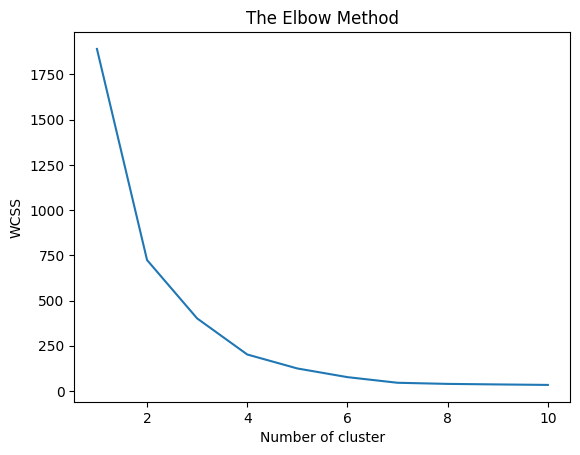

In [377]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)   
plt.title('The Elbow Method') 
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show

In [378]:
# Print cluster assignments
print(y_kmeans)

# Iterate through clusters
for cluster_num in range(3):
    # Filter dataset for each cluster
    cluster_books = dataset.loc[y_kmeans == cluster_num, 'Judul Buku'].tolist()
    # Append cluster information to the list
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books': ', '.join(cluster_books)})


[0 0 2 1 0 2 0 2 2 0 2 2 2 2 0 2 0 2 2 1 2 0 0 2 1 0 1 2 2 2 2 0 2 0 0 0 2
 0 2 0]


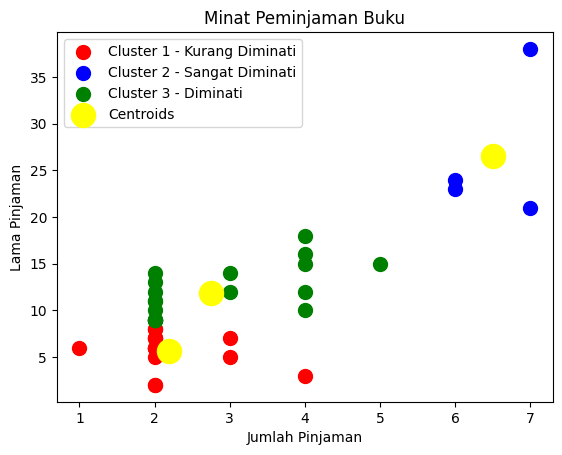

In [379]:
# Perform K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dataset['Cluster'] = y_kmeans

# Scatter plot with clusters and centroids
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1 - Kurang Diminati')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2 - Sangat Diminati')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3 - Diminati')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Minat Peminjaman Buku')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Lama Pinjaman')
plt.legend()
plt.show()

In [380]:
# Create a list to store cluster information
cluster_data = []

# Iterate through clusters
for cluster_num in range(3):
    # Filter dataset for each cluster
    cluster_books = dataset.loc[dataset['Cluster'] == cluster_num, 'Judul Buku'].tolist()
    # Get a summary of the books (e.g., count)
    books_summary = f"Total books: {len(cluster_books)}"
    # Append cluster information to the list
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books Summary': books_summary})

# Convert the list to a DataFrame
cluster_table = pd.DataFrame(cluster_data)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(cluster_table)


     Cluster    Books Summary
0  Cluster 1  Total books: 16
1  Cluster 2   Total books: 4
2  Cluster 3  Total books: 20


In [381]:
# Create a list to store cluster information
cluster_data = []

# Iterate through clusters
for cluster_num in range(3):
    # Filter dataset for each cluster
    cluster_books = dataset.loc[dataset['Cluster'] == cluster_num, 'Judul Buku'].tolist()
    # Append cluster information to the list
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books': ', '.join(cluster_books)})

# Convert the list to a DataFrame
cluster_table = pd.DataFrame(cluster_data)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(cluster_table)



     Cluster                                              Books
0  Cluster 1  101 Kisah, 360 Days of Wonder, Atlas Sejarah N...
1  Cluster 2  Api Tauhid, Hujan, KeylanDara, Misan Catatan Amal
2  Cluster 3  500 Tanda Jawab Transaksi Syariah Sehari-hari,...
